<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Linear_Regression_Weather_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing weather data from the .csv file to NumPy arrays**


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("weatherHistory.csv")

print(df)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

# **2. Extracting arrays of the required parameters from the .csv file**

In [ ]:
temp_and_press = np.array(df.iloc[:,[3,10]])

print(temp_and_press)

[[   9.47222222 1015.13      ]
 [   9.35555556 1015.63      ]
 [   9.37777778 1015.94      ]
 ...
 [  22.03888889 1015.66      ]
 [  21.52222222 1015.95      ]
 [  20.43888889 1016.16      ]]


In [ ]:
humidity = np.array(df["Humidity"])

print(humidity)

[0.89 0.86 0.89 ... 0.56 0.6  0.61]


# **3. Plotting the Humidity vs Temperature and Pressure data**

Text(0.5, 0, 'Humidity')

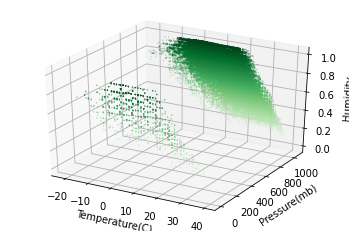

In [ ]:
from mpl_toolkits import mplot3d

# %matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = humidity
xdata = np.array(df["Temperature (C)"])
ydata = np.array(df["Pressure (millibars)"])
ax.scatter3D(xdata, ydata, zdata,s = 0.06, c=zdata, cmap='Greens')

# Labelling the axes
ax.set_xlabel("Temperature(C)")
ax.set_ylabel("Pressure(mb)")
ax.set_zlabel('Humidity')

# **4. Applying Linear Regression to find the best fit curve**

In [ ]:
from sklearn import linear_model

humidity = humidity.reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(temp_and_press, humidity)

slope = reg.coef_
slope = np.reshape(slope,2)
print(slope)

[-1.29388906e-02  3.35959467e-06]


In [ ]:
intercept = reg.intercept_
print(intercept)

[0.88592412]


# **5. Plotting the resulting curve along with the training data**

Text(0.5, 0, 'Humidity')

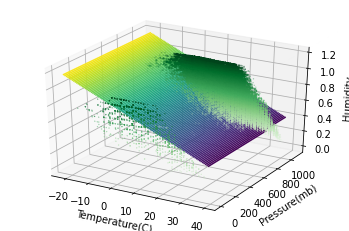

In [ ]:
# The parameters w0 (bias), w1, w2 obtained after linear regression
w0 = intercept[0]
w1 = slope[0]
w2 = slope[1]

# %matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = humidity
xdata = np.array(df["Temperature (C)"])
ydata = np.array(df["Pressure (millibars)"])
ax.scatter3D(xdata, ydata, zdata,s = 0.06, c=zdata, cmap='Greens')

# Plotting the best fit plane
def f(x,y):
  return (w0 + w1*x + w2*y)

xdata = np.arange(-22, 40)        # Manually entered values by obeserving the min and max of data
ydata = np.arange(0, 1100, 18)

X, Y = np.meshgrid(xdata, ydata)
zdata = f(X, Y)

ax.contour3D(xdata, ydata, zdata, 100)

# Labelling the axes
ax.set_xlabel("Temperature(C)")
ax.set_ylabel("Pressure(mb)")
ax.set_zlabel('Humidity')
